<a href="https://colab.research.google.com/github/bmybest/NEXTGEN-AI-CAMP/blob/main/Nextgen_AI_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import os

import torch
import torch.nn.functional as F
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, random_split

from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# This method loads the VGG16 model with the default pretrained weights using the older syntax
# model = models.vgg16(pretrained=True)

# This method loads the VGG16 model with the default pretrained weights
model = models.vgg16(weights=models.VGG16_Weights.DEFAULT)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:05<00:00, 105MB/s]


In [ ]:
model

#classifier = Dense

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
model.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [ ]:
model.features[30]

MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

In [ ]:
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [ ]:
model.classifier[-1]

Linear(in_features=4096, out_features=1000, bias=True)

In [ ]:
model.features[0]

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [ ]:
for x in model.features[0].parameters():
  print(x.shape)
  # break
#torch.Size([64, 3, 3, 3]) = hidden layer, kanel(3*3), input

torch.Size([64, 3, 3, 3])
torch.Size([64])


In [ ]:
for x in model.features[0].parameters():
  print(x)
#weight

Parameter containing:
tensor([[[[-5.5373e-01,  1.4270e-01,  5.2896e-01],
          [-5.8312e-01,  3.5655e-01,  7.6566e-01],
          [-6.9022e-01, -4.8019e-02,  4.8409e-01]],

         [[ 1.7548e-01,  9.8630e-03, -8.1413e-02],
          [ 4.4089e-02, -7.0323e-02, -2.6035e-01],
          [ 1.3239e-01, -1.7279e-01, -1.3226e-01]],

         [[ 3.1303e-01, -1.6591e-01, -4.2752e-01],
          [ 4.7519e-01, -8.2677e-02, -4.8700e-01],
          [ 6.3203e-01,  1.9308e-02, -2.7753e-01]]],


        [[[ 2.3254e-01,  1.2666e-01,  1.8605e-01],
          [-4.2805e-01, -2.4349e-01,  2.4628e-01],
          [-2.5066e-01,  1.4177e-01, -5.4864e-03]],

         [[-1.4076e-01, -2.1903e-01,  1.5041e-01],
          [-8.4127e-01, -3.5176e-01,  5.6398e-01],
          [-2.4194e-01,  5.1928e-01,  5.3915e-01]],

         [[-3.1432e-01, -3.7048e-01, -1.3094e-01],
          [-4.7144e-01, -1.5503e-01,  3.4589e-01],
          [ 5.4384e-02,  5.8683e-01,  4.9580e-01]]],


        [[[ 1.7715e-01,  5.2149e-01,  9.8740

In [ ]:
#freeze weight param.requires_grad = False ให้หมด
for param in model.features.parameters():
  param.requires_grad = False

In [ ]:
for param in model.classifier.parameters():
    param.requires_grad = False

In [ ]:
dummy_input = torch.zeros(32, *(3, 224, 224))
model(dummy_input).shape

#1000 = class ที่โมเดลทำนาย

torch.Size([32, 1000])

How to add layers in a pretrained model?

In [ ]:
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [ ]:
#weight ของทุกชั้นยังอยู่ ยกเว้นชั้นสุดท้ายที่เพิ่มเข้าไป
num_classes = 10
model.classifier.append(nn.Linear(model.classifier[6].out_features, num_classes))

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
  (7): Linear(in_features=1000, out_features=10, bias=True)
)

How to edit layers in a pretrained model?

In [ ]:
#weight ของชั้นที่แก้จะหายไป
num_classes = 10
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)

How to remove layers in a pretrained model?

In [ ]:
#เอาบรรทัดสุดท้ายออก
list(model.classifier.children())[:-1]

[Linear(in_features=25088, out_features=4096, bias=True),
 ReLU(inplace=True),
 Dropout(p=0.5, inplace=False),
 Linear(in_features=4096, out_features=4096, bias=True),
 ReLU(inplace=True),
 Dropout(p=0.5, inplace=False),
 Linear(in_features=4096, out_features=10, bias=True)]

In [ ]:
model.classifier = nn.Sequential(*list(model.classifier.children())[:-1])

In [ ]:
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=10, bias=True)
)

Custom Pretrained Model

In [ ]:
class customVGG16(nn.Module):
    def __init__(self, input_size=(3,224,224), num_classes=10):
        super(customVGG16, self).__init__()

        self.vgg16 = models.vgg16(weights=models.VGG16_Weights.DEFAULT)
        self.vgg16.flatten = nn.Flatten()

        for param in self.vgg16.features.parameters():
            param.requires_grad = False

        for param in self.vgg16.classifier.parameters():
            param.requires_grad = False

        self.vgg16.classifier[6] = nn.Linear(self.vgg16.classifier[-1].in_features, num_classes)

    def forward(self, x):
      x = self.vgg16.features(x)
      x = self.vgg16.avgpool(x)
      x = self.vgg16.flatten(x)
      x = self.vgg16.classifier(x)
      return F.log_softmax(x, dim=1)

In [ ]:
#ทดลองดูว่าถ้าเอาinpput ไปใส่แล้วจะได้คำตอบไหม ตรวจสอบว่าmodel ไม่ได้ เกิด error
dummy_input = torch.zeros(32, *(3, 224, 224))

In [ ]:
VGG16 = customVGG16()
VGG16(dummy_input).shape

torch.Size([32, 10])

Preparing Dataset & DataLoader

In [ ]:
!git clone https://github.com/NextGen-AI-Camp/curriculum.git

Cloning into 'curriculum'...
remote: Enumerating objects: 349, done.
remote: Counting objects: 100% (168/168), done.
remote: Compressing objects: 100% (137/137), done.
remote: Total 349 (delta 81), reused 84 (delta 23), pack-reused 181
Receiving objects: 100% (349/349), 42.95 MiB | 16.54 MiB/s, done.
Resolving deltas: 100% (134/134), done.


In [ ]:
!mv /content/curriculum/Dataset/thai-handwritten-dataset/thai-handwritten-dataset.zip .

In [ ]:
!unzip thai-handwritten-dataset.zip

Archive:  thai-handwritten-dataset.zip
   creating: thai-handwritten-dataset/
   creating: thai-handwritten-dataset/0/
  inflating: thai-handwritten-dataset/0/0098326c-aa9e-410d-b949-e13d3cd74cfd.png  
  inflating: thai-handwritten-dataset/0/02415aec-d4a3-4762-a1e5-bf4fe584aa66.png  
  inflating: thai-handwritten-dataset/0/051d7c9a-2b54-4e73-9d0b-3fa75dcf1539.png  
  inflating: thai-handwritten-dataset/0/05587e2a-e6f1-4191-8246-61e3f1cf59e9.png  
  inflating: thai-handwritten-dataset/0/09165777-8ac1-4638-bf06-741896c7e1b9.png  
  inflating: thai-handwritten-dataset/0/0a51150d-0afd-455e-9782-9141b68475ed.png  
  inflating: thai-handwritten-dataset/0/0a8e39b3-4d7c-4050-a25d-746a6b8de686.png  
  inflating: thai-handwritten-dataset/0/0b48e328-0e73-4946-8fe5-c2324cf55c88.png  
  inflating: thai-handwritten-dataset/0/0b7155a7-4e52-4485-a675-d53397049917.png  
  inflating: thai-handwritten-dataset/0/0f14b574-daf6-4a22-ae06-86eaeee72efa.png  
  inflating: thai-handwritten-dataset/0/12a710d6-87

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.samples = []

        for subdir in os.scandir(root_dir):
            if subdir.is_dir():
                label = int(subdir.name)
                for file in os.scandir(subdir.path):
                    if file.is_file():
                        self.samples.append((file.path, label))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image, label

In [ ]:
class ReverseIntensity:
    def __call__(self, x):
        return 1 - x

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    ReverseIntensity(),
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

path = '/content/thai-handwritten-dataset'
dataset = CustomDataset(path, transform=transform)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader, test_loader = DataLoader(train_dataset, batch_size=32, shuffle=True), DataLoader(test_dataset, batch_size=32, shuffle=False)


In [ ]:
images, labels = next(iter(train_loader))
images.shape, labels.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

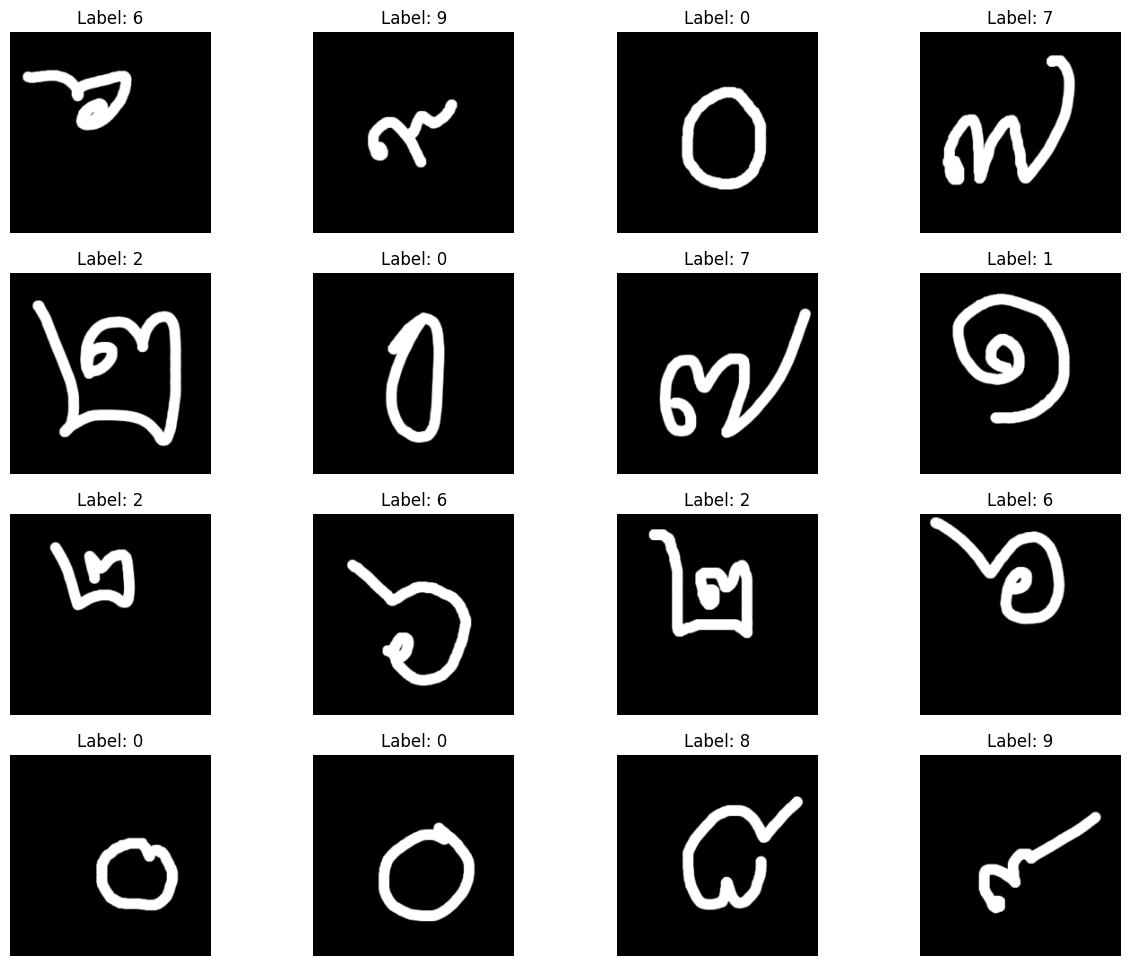

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(15, 12))  # 4x4 grid for 16 images
axes = axes.flatten()

for idx, (img ,label, ax) in enumerate(zip(images, labels, axes)):
    image = img.numpy().transpose((1, 2, 0))

    # Shift the image so the minimum value is 0
    shifted_image = image - image.min()

    # Scale the image to fit within [0, 1]
    normalized_image = shifted_image / shifted_image.max()

    ax.imshow(normalized_image, cmap='seismic')
    ax.axis('off')
    ax.set_title(f"Label: {label}")

In [ ]:
def train(model, optimizer, epochs, device, train_loader, test_loader):
    model.to(device)
    for epoch in range(epochs):

        model.train()
        train_loss, train_correct, train_total = 0, 0, 0

        train_bar = tqdm(train_loader,desc=f'🚀Training Epoch [{epoch+1}/{epochs}]',unit='batch')

        for batch_idx, (data, target) in enumerate(train_bar):

            data, target = data.to(device), target.to(device)

            output = model(data)
            optimizer.zero_grad()

#ใช้ nll_loss เพราะว่าใช้ softmax
            loss = F.nll_loss(output, target)
            loss.backward()

            optimizer.step()

            pred = output.argmax(dim=1, keepdim=True)
            train_correct += pred.eq(target.view_as(pred)).sum().item()

            train_loss += F.nll_loss(output, target, reduction='sum').item()
            train_bar.set_postfix(loss=loss.item())

        train_loss /= len(train_loader.dataset)

        model.eval()
        test_correct, test_loss = 0, 0

        with torch.no_grad():

            test_bar = tqdm(test_loader,desc=f'📄Testing  Epoch [{epoch+1}/{epochs}]',unit='batch')

            for data, target in test_bar:
                data, target = data.to(device), target.to(device)
                output = model(data)

                test_loss += F.nll_loss(output, target, reduction='sum').item()

                pred = output.argmax(dim=1, keepdim=True)
                test_correct += pred.eq(target.view_as(pred)).sum().item()

            test_loss /= len(test_loader.dataset)

            print('\nTrain set:\tAverage loss: {:.4f}, Accuracy: {}/{}\t({:.0f}%)'.format(
            train_loss, train_correct, len(train_loader.dataset), 100. * train_correct / len(train_loader.dataset)))
            print('Test set:\tAverage loss: {:.4f}, Accuracy: {}/{}\t\t({:.0f}%)\n'.format(
            test_loss, test_correct, len(test_loader.dataset), 100. * test_correct / len(test_loader.dataset),))


In [ ]:
model = customVGG16()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train(model, optimizer, epochs, device, train_loader, test_loader)

📄Testing  Epoch [1/5]: 100%|██████████| 11/11 [00:03<00:00,  3.56batch/s]



Train set:	Average loss: 1.6121, Accuracy: 658/1400	(47%)
Test set:	Average loss: 1.1232, Accuracy: 245/350		(70%)



📄Testing  Epoch [2/5]: 100%|██████████| 11/11 [00:02<00:00,  3.89batch/s]



Train set:	Average loss: 1.0080, Accuracy: 966/1400	(69%)
Test set:	Average loss: 0.8363, Accuracy: 273/350		(78%)



📄Testing  Epoch [3/5]: 100%|██████████| 11/11 [00:02<00:00,  3.91batch/s]



Train set:	Average loss: 0.8421, Accuracy: 1034/1400	(74%)
Test set:	Average loss: 0.7331, Accuracy: 277/350		(79%)



📄Testing  Epoch [4/5]: 100%|██████████| 11/11 [00:02<00:00,  3.83batch/s]



Train set:	Average loss: 0.7345, Accuracy: 1100/1400	(79%)
Test set:	Average loss: 0.6458, Accuracy: 292/350		(83%)



📄Testing  Epoch [5/5]: 100%|██████████| 11/11 [00:03<00:00,  3.50batch/s]


Train set:	Average loss: 0.6653, Accuracy: 1121/1400	(80%)
Test set:	Average loss: 0.5715, Accuracy: 296/350		(85%)



Visualizing Feature Maps ก่อนถึง dense

In [ ]:
class FeatureExtractor(nn.Module):
    def __init__(self, model, target_layers):
        super(FeatureExtractor, self).__init__()
        self.model = model
        self.target_layers = target_layers
        self.features = []

        for layer_name, layer in self.model.named_modules():
            if layer_name in target_layers:
                print(layer_name)
                layer.register_forward_hook(self.save_feature(layer_name))

    def save_feature(self, layer_name):
        def hook(module, input, output):
            self.features.append(output.clone())
        return hook

    def forward(self, x):
        self.features = []
        self.model(x)
        return self.features


In [ ]:
model

customVGG16(
  (vgg16): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
      (1

In [ ]:
targets = [name for name, _ in model.named_modules() if 'features.' in name]
targets

['vgg16.features.0',
 'vgg16.features.1',
 'vgg16.features.2',
 'vgg16.features.3',
 'vgg16.features.4',
 'vgg16.features.5',
 'vgg16.features.6',
 'vgg16.features.7',
 'vgg16.features.8',
 'vgg16.features.9',
 'vgg16.features.10',
 'vgg16.features.11',
 'vgg16.features.12',
 'vgg16.features.13',
 'vgg16.features.14',
 'vgg16.features.15',
 'vgg16.features.16',
 'vgg16.features.17',
 'vgg16.features.18',
 'vgg16.features.19',
 'vgg16.features.20',
 'vgg16.features.21',
 'vgg16.features.22',
 'vgg16.features.23',
 'vgg16.features.24',
 'vgg16.features.25',
 'vgg16.features.26',
 'vgg16.features.27',
 'vgg16.features.28',
 'vgg16.features.29',
 'vgg16.features.30']

In [ ]:
feature_extractor = FeatureExtractor(model=model, target_layers=targets)

vgg16.features.0
vgg16.features.1
vgg16.features.2
vgg16.features.3
vgg16.features.4
vgg16.features.5
vgg16.features.6
vgg16.features.7
vgg16.features.8
vgg16.features.9
vgg16.features.10
vgg16.features.11
vgg16.features.12
vgg16.features.13
vgg16.features.14
vgg16.features.15
vgg16.features.16
vgg16.features.17
vgg16.features.18
vgg16.features.19
vgg16.features.20
vgg16.features.21
vgg16.features.22
vgg16.features.23
vgg16.features.24
vgg16.features.25
vgg16.features.26
vgg16.features.27
vgg16.features.28
vgg16.features.29
vgg16.features.30


In [ ]:
images, labels = next(iter(test_loader))
images.shape

torch.Size([32, 3, 224, 224])

In [ ]:
input_data = images[0].unsqueeze(0).to(device)
input_data.shape

torch.Size([1, 3, 224, 224])

In [ ]:
input_data[0].shape

torch.Size([3, 224, 224])

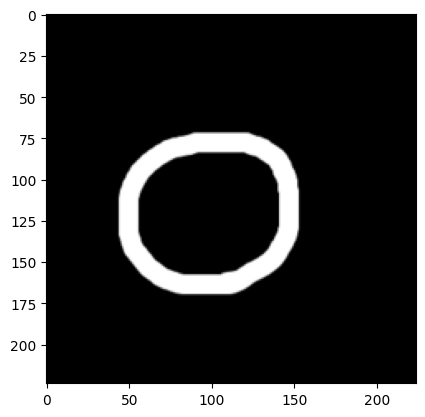

In [ ]:
plt.imshow(input_data[0].cpu().numpy().transpose(1, 2, 0))

In [ ]:
extracted_features = feature_extractor(input_data)

for idx, feature in enumerate(extracted_features):
    print(f"Feature from layer {targets[idx]}: {feature.shape}")

Feature from layer vgg16.features.0: torch.Size([1, 64, 224, 224])
Feature from layer vgg16.features.1: torch.Size([1, 64, 224, 224])
Feature from layer vgg16.features.2: torch.Size([1, 64, 224, 224])
Feature from layer vgg16.features.3: torch.Size([1, 64, 224, 224])
Feature from layer vgg16.features.4: torch.Size([1, 64, 112, 112])
Feature from layer vgg16.features.5: torch.Size([1, 128, 112, 112])
Feature from layer vgg16.features.6: torch.Size([1, 128, 112, 112])
Feature from layer vgg16.features.7: torch.Size([1, 128, 112, 112])
Feature from layer vgg16.features.8: torch.Size([1, 128, 112, 112])
Feature from layer vgg16.features.9: torch.Size([1, 128, 56, 56])
Feature from layer vgg16.features.10: torch.Size([1, 256, 56, 56])
Feature from layer vgg16.features.11: torch.Size([1, 256, 56, 56])
Feature from layer vgg16.features.12: torch.Size([1, 256, 56, 56])
Feature from layer vgg16.features.13: torch.Size([1, 256, 56, 56])
Feature from layer vgg16.features.14: torch.Size([1, 256, 5

In [ ]:
conv_output = extracted_features[8].squeeze(0) # vgg16.features.7
conv_output.shape

torch.Size([128, 112, 112])

In [ ]:
# Create a figure to plot the output channels
num_channels = conv_output.shape[0]
num_cols = 8
num_rows = (num_channels + num_cols - 1) // num_cols

num_channels, num_cols, num_rows

(128, 8, 16)

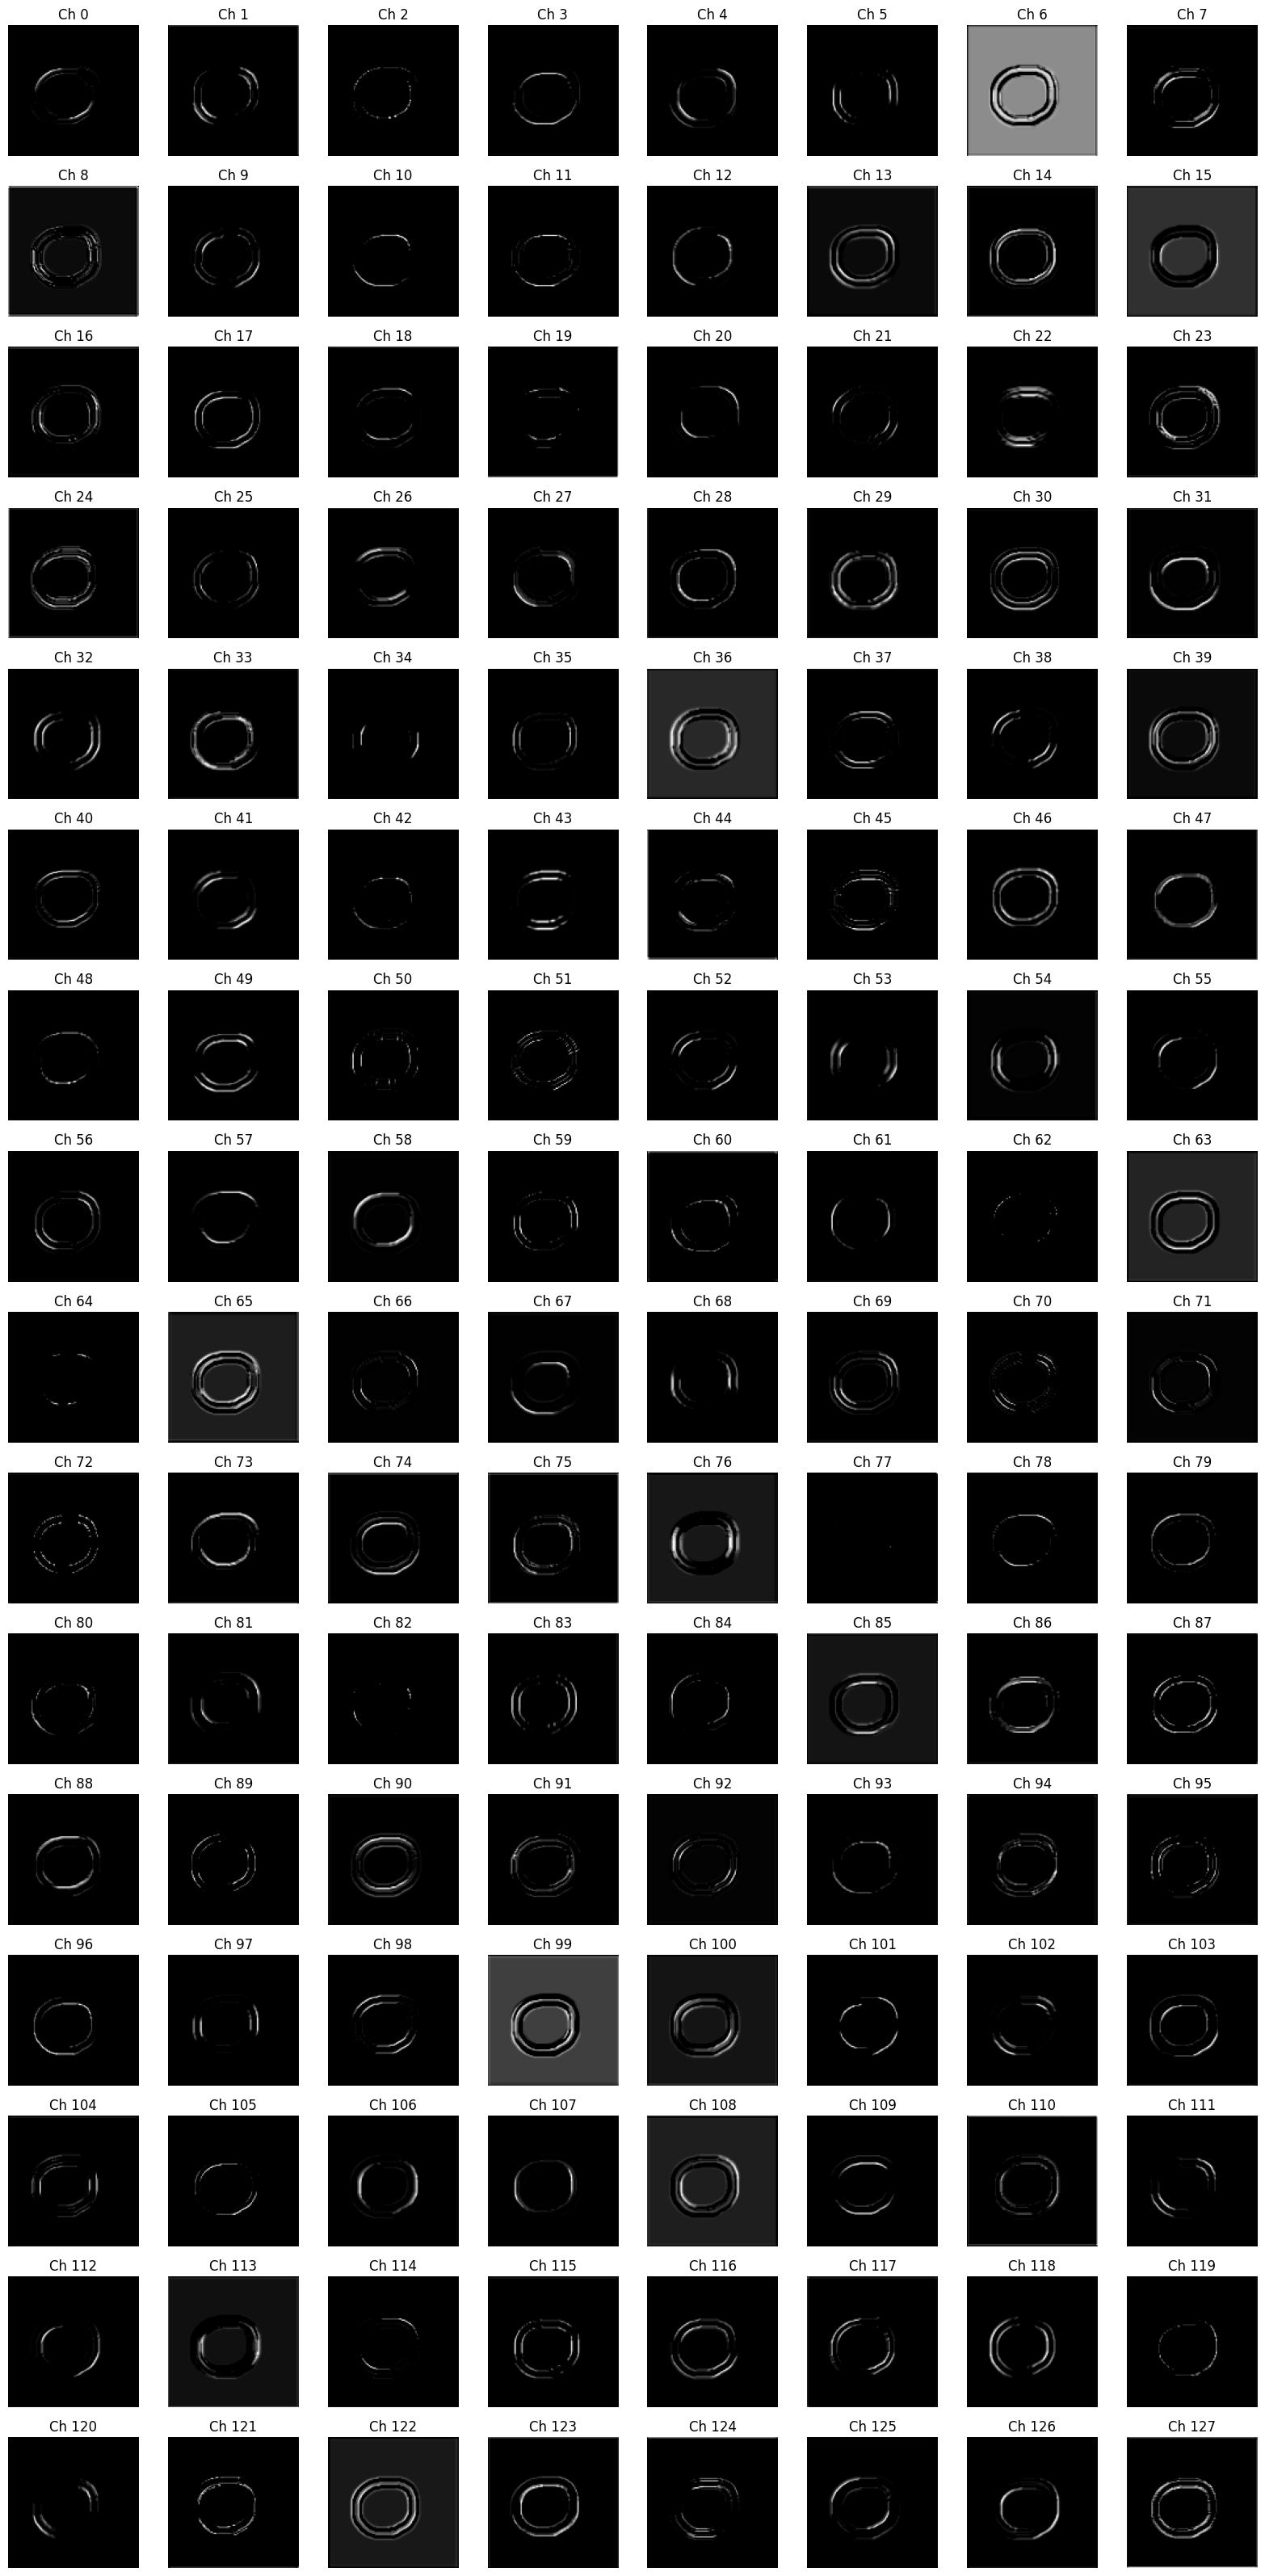

In [ ]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 2, num_rows * 2))
axes = axes.flatten()  # Flatten to easily iterate through

for i in range(num_channels):
    ax = axes[i]
    channel_data = conv_output[i].detach().cpu().numpy()
    # print(np.unique(channel_data))

    ax.imshow(channel_data, cmap='gray')
    ax.axis('off')
    ax.set_title(f'Ch {i}')

# Hide any remaining subplots if there are any
for i in range(num_channels, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
class MultiTaskModel(nn.Module):
    def __init__(self):
        super(MultiTaskModel, self).__init__()

        # Shared layers
        self.shared = nn.Sequential(
            nn.Linear(100, 50),
            nn.ReLU()
        )

        # Task-specific layers
        self.task1 = nn.Linear(50, 10)
        self.task2 = nn.Linear(50, 5)

    def forward(self, x):

        # Forward pass through shared layers
        x = self.shared(x)

        # Forward pass through task-specific layers
        out1 = self.task1(x)
        out2 = self.task2(x)

        return F.log_softmax(out1, dim=1), F.log_softmax(out2, dim=1)

In [ ]:
# Define loss functions and optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)

for epoch in range(10):
    for batch_idx, (data, target1, target2) in enumerate(train_loader):

        data, target1, target2 = data.to(device), target1.to(device), target2.to(device)

        output1, output2 = model(data)
        optimizer.zero_grad()

        loss_task1 = F.nll_loss(output1, target1)
        loss_task2 = F.nll_loss(output2, target2)

        # Combine the losses (you can optionally weight them)
        loss = loss_task1 + loss_task2

        # Optional: Apply different weights to each task's loss
         #(weight scale loss เพราะบางครั้ง loss ของแต่ละ task ต่างกันมาก)
        # lambda_task1, lambda_task2 = 0.1, 0.9 #0.1, 0.9 ปรับน้ำหนักเอาเอง
        # loss = lambda_task1 * loss_task1 + lambda_task2 * loss_task2

        loss.backward()
        optimizer.step()

ValueError: not enough values to unpack (expected 3, got 2)